In [1]:
import pandas as pd
import datetime
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Overfitting detecting
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
col_list=['Page_popularity','Page_visited_no_of_times','Page_talking_about','Page_category','c1','c2','c3','c4',
          'c5','c6','c7', 'c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','c18','c19','c20','c21','c22',
          'c23','c24','c25','CC1','CC2','CC3','CC4','CC5','Base_time','Post_length_char_count',
          'Post_share_count','Post_promoted','Time_target','Sunday_post','Monday_post','Tuesday_post',
          'Wednesday_post','Thrusday_post','Friday_post','Saturday_post','Sunday_base','Monday_base',
          'Tuesday_base','Wednesday_base','Thrusday_base','Friday_base','Saturday_base','Target_variable']
d1=pd.read_csv("Dataset/Training/Features_Variant_1.csv")
d1.columns=col_list
d2=pd.read_csv("Dataset/Training/Features_Variant_2.csv")
d2.columns=col_list
d3=pd.read_csv("Dataset/Training/Features_Variant_3.csv")
d3.columns=col_list
d4=pd.read_csv("Dataset/Training/Features_Variant_4.csv")
d4.columns=col_list
d5=pd.read_csv("Dataset/Training/Features_Variant_5.csv")
d5.columns=col_list

In [4]:
frames_main = [d1 , d2 , d3 , d4 , d5]
df = pd.concat(frames_main)
print (df.shape)
df.head()

(602813, 54)


,Page_popularity,Page_visited_no_of_times,Page_talking_about,Page_category,c1,c2,c3,c4,c5,c6,...,Friday_post,Saturday_post,Sunday_base,Monday_base,Tuesday_base,Wednesday_base,Thrusday_base,Friday_base,Saturday_base,Target_variable
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
column_list1=['CC2','Base_time','Post_share_count','c3','c8','c18','CC1','CC4','Post_length_char_count','CC5']
x_train=df_train[column_list1]
y_train=df_train['Target_variable']
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test=df_test[column_list1]
y_test=df_test['Target_variable']
scaler.fit(x_test)
x_test_sc=scaler.transform(x_test)
print(x_train.shape,',',x_test.shape,',',y_train.shape,',',y_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(421969, 10) , (180844, 10) , (421969,) , (180844,)


# Regularization


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 10.8161179043
RMSE : 34.8833892305

For Testing Data : 
R2   : -9.43839326806e-06
MAE  : 10.7491669914
RMSE : 33.4589463158

Degree :  1
For Training Data : 
R2   : 0.327121579213
MAE  : 8.01159873155
RMSE : 28.6145535415

For Testing Data : 
R2   : 0.349472134773
MAE  : 7.91650390607
RMSE : 26.9862887345

Degree :  2
For Training Data : 
R2   : 0.516934379361
MAE  : 6.70740867859
RMSE : 24.2449749078

For Testing Data : 
R2   : 0.517008735675
MAE  : 6.60255911253
RMSE : 23.2530458822

Degree :  3
For Training Data : 
R2   : 0.625530838931
MAE  : 5.70631553549
RMSE : 21.3465012303

For Testing Data : 
R2   : 0.610304515001
MAE  : 5.66584687375
RMSE : 20.8868475857


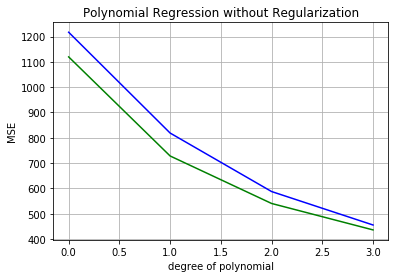

In [29]:
# MSE of quartic expression will be very large compared with the lower degree, so let's just end at 3.
train_mse_list = []
test_mse_list = []
degree_of_polynomial = []
for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    # Transfer the X to a polynomial form by using fit_transform
    x_train_ = model.fit_transform(x_train)
    x_test_ = model.fit_transform(x_test)
    lm = linear_model.LinearRegression()
    lm.fit(x_train_, y_train)
    train_pred = lm.predict(x_train_)
    train_mse_list.append(mean_squared_error(y_train, train_pred))
    test_pred = lm.predict(x_test_)
    test_mse_list.append(mean_squared_error(y_test, test_pred))
    degree_of_polynomial.append(i)
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred))
    print("MAE  :",mean_absolute_error(y_train,train_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred)))

    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred))
    print("MAE  :",mean_absolute_error(y_test,test_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred)))
 

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Regularization')
plt.plot(degree_of_polynomial, train_mse_list, '-b', degree_of_polynomial, test_mse_list, '-g')
plt.show()

Lasso


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 10.8161179043
RMSE : 34.8833892305

For Testing Data : 
R2   : -9.43839326806e-06
MAE  : 10.7491669914
RMSE : 33.4589463158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  1
For Training Data : 
R2   : 0.326531265931
MAE  : 8.01617877975
RMSE : 28.6271025009

For Testing Data : 
R2   : 0.349857286031
MAE  : 7.91527580506
RMSE : 26.9782988062

Degree :  2
For Training Data : 
R2   : 0.50849402666
MAE  : 6.77532421527
RMSE : 24.4558675698

For Testing Data : 
R2   : 0.508624339409
MAE  : 6.67029528284
RMSE : 23.4540059469

Degree :  3
For Training Data : 
R2   : 0.605545299791
MAE  : 5.66206566986
RMSE : 21.9087319339

For Testing Data : 
R2   : 0.599633601594
MAE  : 5.5910660854
RMSE : 21.170885397


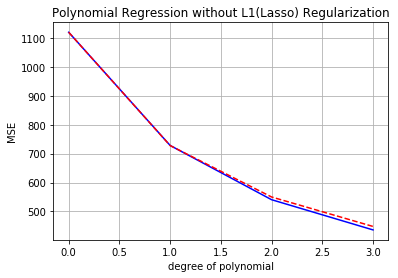

In [18]:
from sklearn.linear_model import Lasso

# Randomly pick a alpha value for regularization
l1reg = Lasso(alpha=0.000003, normalize=True)

l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    x_train_ = model.fit_transform(x_train)
    x_test_ = model.fit_transform(x_test)
    
    l1reg.fit(x_train_, y_train)
    train_pred_l1 = l1reg.predict(x_train_)
    test_pred_l1 = l1reg.predict(x_test_)
    l1reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l1))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_l1))
    print("MAE  :",mean_absolute_error(y_train,train_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_l1)))

    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_l1))
    print("MAE  :",mean_absolute_error(y_test,test_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_l1)))


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l1reg_test_mse_list, '--r')
plt.show()

Ridge


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 10.8161179043
RMSE : 34.8833892305

For Testing Data : 
R2   : -9.43839326806e-06
MAE  : 10.7491669914
RMSE : 33.4589463158

Degree :  1
For Training Data : 
R2   : 0.327107309989
MAE  : 8.01079576654
RMSE : 28.6148569435

For Testing Data : 
R2   : 0.349627325991
MAE  : 7.91471648482
RMSE : 26.9830695912

Degree :  2
For Training Data : 
R2   : 0.515646459948
MAE  : 6.72651500925
RMSE : 24.2772736135

For Testing Data : 
R2   : 0.516263935133
MAE  : 6.61900131949
RMSE : 23.2709677484

Degree :  3
For Training Data : 
R2   : 0.61914869414
MAE  : 5.68607324618
RMSE : 21.5276388174

For Testing Data : 
R2   : 0.608764954935
MAE  : 5.63126841653
RMSE : 20.9280654856


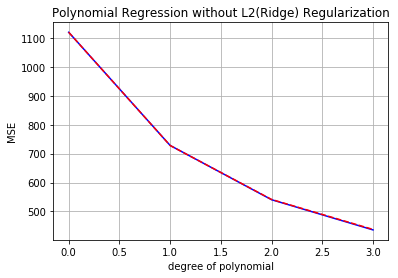

In [33]:
from sklearn.linear_model import Ridge

l2reg = Ridge(alpha=0.00003, normalize=True)

l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    x_train_ = model.fit_transform(x_train)
    x_test_ = model.fit_transform(x_test)
    
    l2reg.fit(x_train_, y_train)
    train_pred_l2 = l2reg.predict(x_train_)
    test_pred_l2 = l2reg.predict(x_test_)
    l2reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l2))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_l2))
    print("MAE  :",mean_absolute_error(y_train,train_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_l2)))

    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_l2))
    print("MAE  :",mean_absolute_error(y_test,test_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_l2)))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l2reg_test_mse_list, '--r')
plt.show()

# Red dash line is the testing error after L2 regularization

Elastic Net


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 10.8161179043
RMSE : 34.8833892305

For Testing Data : 
R2   : -9.43839326806e-06
MAE  : 10.7491669914
RMSE : 33.4589463158

Degree :  1
For Training Data : 
R2   : 0.1713966346
MAE  : 8.53134103811
RMSE : 31.7535305863

For Testing Data : 
R2   : 0.190568069999
MAE  : 8.43219525258
RMSE : 30.1023483161

Degree :  2
For Training Data : 
R2   : 0.253310545018
MAE  : 7.87529194201
RMSE : 30.1431533462

For Testing Data : 
R2   : 0.275989883686
MAE  : 7.74660022312
RMSE : 28.4696762067

Degree :  3
For Training Data : 
R2   : 0.272395228366
MAE  : 7.75334911128
RMSE : 29.755444554

For Testing Data : 
R2   : 0.290462148655
MAE  : 7.63535578266
RMSE : 28.1836991867


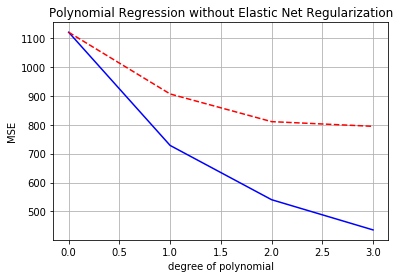

In [34]:
from sklearn.linear_model import ElasticNet
enreg = ElasticNet(alpha=0.00003, normalize=True)

enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    x_train_ = model.fit_transform(x_train)
    x_test_ = model.fit_transform(x_test)
    
    enreg.fit(x_train_, y_train)
    train_pred_en = enreg.predict(x_train_)
    test_pred_en = enreg.predict(x_test_)
    enreg_test_mse_list.append(mean_squared_error(y_test, test_pred_en))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_en))
    print("MAE  :",mean_absolute_error(y_train,train_pred_en))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_en)))

    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_en))
    print("MAE  :",mean_absolute_error(y_test,test_pred_en))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_en)))


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Elastic Net Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, enreg_test_mse_list, '--r')
plt.show()
# Red dash line is the testing error after Elastic Net regularization

The generalization score of linear regression model is 0.326947
The generalization score of quadratic regression model is 0.510494


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The calculated optimal alpha is 0.000050 
The max generalization score of L1 regularized polynomial regression model is 0.496639 +- 0.000041


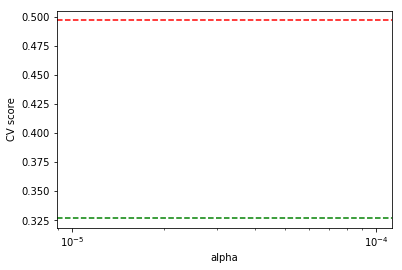

In [25]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, x_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
x_train_ = model.fit_transform(x_train)

pm_score = np.mean(model_selection.cross_val_score(lm, x_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
l1reg = Lasso(normalize=True)
for alpha in alphas:
    l1reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l1reg, x_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(x_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of L1 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 10.8161179043
RMSE : 34.8833892305

For Testing Data : 
R2   : -9.43839326806e-06
MAE  : 10.7491669914
RMSE : 33.4589463158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  1
For Training Data : 
R2   : 0.323709577678
MAE  : 8.05582282706
RMSE : 28.6870104983

For Testing Data : 
R2   : 0.348082815134
MAE  : 7.94969930372
RMSE : 27.0150904094

Degree :  2
For Training Data : 
R2   : 0.500207244064
MAE  : 6.76612138418
RMSE : 24.6611686055

For Testing Data : 
R2   : 0.50116521805
MAE  : 6.66139864665
RMSE : 23.6313522809

Degree :  3
For Training Data : 
R2   : 0.587347617309
MAE  : 5.38327861839
RMSE : 22.408400216

For Testing Data : 
R2   : 0.582860944581
MAE  : 5.300939987
RMSE : 21.6097945167
MSE of linear regression model is 728.259780
MSE of quadratic regression model is 540.704143
MSE of optimal L1 regularized quadratic regression model is 558.440811


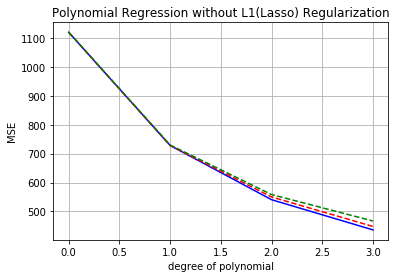

In [35]:
# Set the alpha as the optimal value we got from the last step

optimal_l1reg = Lasso(alpha=0.000050, normalize=True)

opt_l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    x_train_ = model.fit_transform(x_train)
    x_test_ = model.fit_transform(x_test)
    optimal_l1reg.fit(x_train_, y_train)
    train_opt_pred_l1 = optimal_l1reg.predict(x_train_)
    test_opt_pred_l1 = optimal_l1reg.predict(x_test_)
    opt_l1reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l1))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_l1))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_l1)))

    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_l1))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_l1)))


print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L1 regularized quadratic regression model is %f' % opt_l1reg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  l1reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l1reg_test_mse_list, '--g')
plt.show()

# Green dash line is the testing error after L1 regularization with optimal alpha. We can see that it is lower
# than the red dash line which using alpha=0.005.

The generalization score of linear regression model is 0.326947
The generalization score of quadratic regression model is 0.510494
The calculated optimal alpha is 0.000050 
The max generalization score of L2 regularized polynomial regression model is 0.508507 +- 0.000043


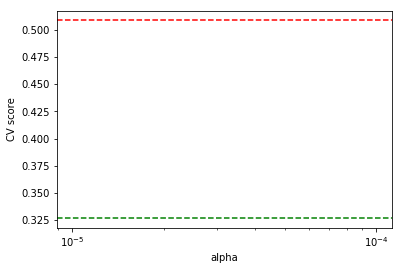

In [36]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, x_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
x_train_ = model.fit_transform(x_train)

pm_score = np.mean(model_selection.cross_val_score(lm, x_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
l2reg = Ridge(normalize=True)
for alpha in alphas:
    l2reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l2reg, x_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(x_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of L2 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 10.8161179043
RMSE : 34.8833892305

For Testing Data : 
R2   : -9.43839326806e-06
MAE  : 10.7491669914
RMSE : 33.4589463158

Degree :  1
For Training Data : 
R2   : 0.327084395512
MAE  : 8.01065839257
RMSE : 28.6153441601

For Testing Data : 
R2   : 0.34970723435
MAE  : 7.91391751362
RMSE : 26.9814118962

Degree :  2
For Training Data : 
R2   : 0.514861076393
MAE  : 6.73487439767
RMSE : 24.2969485481

For Testing Data : 
R2   : 0.515746597563
MAE  : 6.62687755445
RMSE : 23.2834081366

Degree :  3
For Training Data : 
R2   : 0.61755206671
MAE  : 5.67605665775
RMSE : 21.5727163447

For Testing Data : 
R2   : 0.607845490835
MAE  : 5.61735065015
RMSE : 20.9526431821
MSE of linear regression model is 728.259780
MSE of quadratic regression model is 540.704143
MSE of optimal L2 regularized quadratic regression model is 542.117094


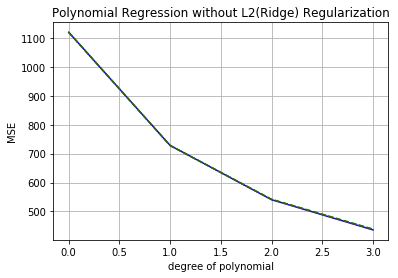

In [37]:
optimal_l2reg = Ridge(alpha=0.000050, normalize=True)

opt_l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    x_train_ = model.fit_transform(x_train)
    x_test_ = model.fit_transform(x_test)
    optimal_l2reg.fit(x_train_, y_train)
    train_opt_pred_l2 = optimal_l2reg.predict(x_train_)
    test_opt_pred_l2 = optimal_l2reg.predict(x_test_)
    opt_l2reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l2))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_l2))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_l2)))

    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_l2))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_l2)))


print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L2 regularized quadratic regression model is %f' % opt_l2reg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  l2reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l2reg_test_mse_list, '--g')
plt.show()

The generalization score of linear regression model is 0.326947
The generalization score of quadratic regression model is 0.510494
The calculated optimal alpha is 0.000050 
The max generalization score of ElasticNet regularized polynomial regression model is 0.234540 +- 0.000027


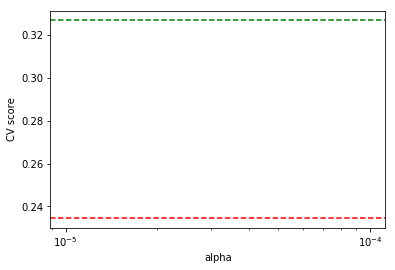

In [39]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, x_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
x_train_ = model.fit_transform(x_train)

pm_score = np.mean(model_selection.cross_val_score(lm, x_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
enreg = ElasticNet(normalize=True)
for alpha in alphas:
    enreg.alpha = alpha
    this_scores = model_selection.cross_val_score(enreg, x_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(x_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of ElasticNet regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()
# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 10.8161179043
RMSE : 34.8833892305

For Testing Data : 
R2   : -9.43839326806e-06
MAE  : 10.7491669914
RMSE : 33.4589463158

Degree :  1
For Training Data : 
R2   : 0.12841258122
MAE  : 9.12952670138
RMSE : 32.5667297459

For Testing Data : 
R2   : 0.143082184796
MAE  : 9.04123929552
RMSE : 30.9727520988

Degree :  2
For Training Data : 
R2   : 0.223890979881
MAE  : 8.31974424358
RMSE : 30.7312368174

For Testing Data : 
R2   : 0.247164213482
MAE  : 8.18906678646
RMSE : 29.0308892029

Degree :  3
For Training Data : 
R2   : 0.237060644886
MAE  : 8.2137639702
RMSE : 30.4693846073

For Testing Data : 
R2   : 0.255880599437
MAE  : 8.09182633623
RMSE : 28.8623390675
MSE of linear regression model is 728.259780
MSE of quadratic regression model is 540.704143
MSE of optimal L2 regularized quadratic regression model is 842.792528


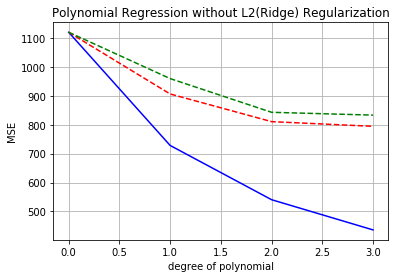

In [40]:
optimal_enreg = ElasticNet(alpha=0.000050, normalize=True)

opt_enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    x_train_ = model.fit_transform(x_train)
    x_test_ = model.fit_transform(x_test)
    optimal_enreg.fit(x_train_, y_train)
    train_opt_pred_enreg = optimal_enreg.predict(x_train_)
    test_opt_pred_enreg = optimal_enreg.predict(x_test_)
    opt_enreg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_enreg))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_enreg))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_enreg))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_enreg)))

    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_enreg))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_enreg))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_enreg)))


print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L2 regularized quadratic regression model is %f' % opt_enreg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  enreg_test_mse_list, '--r',
         degree_of_polynomial, opt_enreg_test_mse_list, '--g')
plt.show()

# Cross Validation

Cross-validation, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set). The goal of cross validation is to define a dataset to "test" the model in the training phase (i.e., the validation set), in order to limit problems like overfitting[citation needed], give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem), etc.

For training data

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracy_train = cross_val_score(estimator = LinearRegression() , X = x_train, y = y_train , cv = 10)

accuracy_train

array([ 0.35801257,  0.35113636,  0.32221347,  0.35917273,  0.31171417,
        0.31960455,  0.32303052,  0.30860253,  0.31135925,  0.31142773])

In [43]:
accuracy_train.mean()

0.32762738850214124

For testing data

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracy_test = cross_val_score(estimator = LinearRegression() , X = x_test, y = y_test , cv = 10)

accuracy_test

array([ 0.30978839,  0.33264696,  0.31779824,  0.39597244,  0.37537142,
        0.42234633,  0.29042547,  0.34633878,  0.37409226,  0.36824987])

In [45]:
accuracy_test.mean()

0.35330301776104428

# Bias Variance Tradeoff

The bias–variance decomposition is a way of analyzing a learning algorithm's expected generalization error with respect to a particular problem as a sum of three terms, the bias, variance, and a quantity called the irreducible error, resulting from noise in the problem itself.

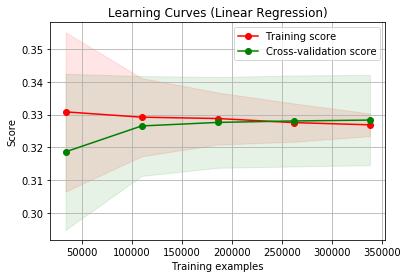

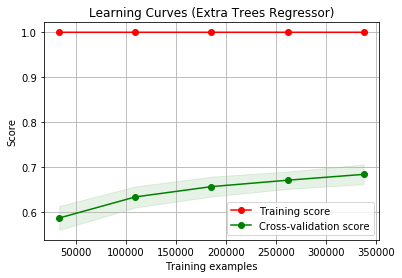

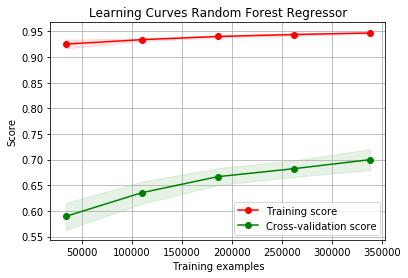

Wall time: 28min 5s


In [48]:
%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = x_train.values, y_train.values


title = "Learning Curves (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (Extra Trees Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = ExtraTreesRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves Random Forest Regressor"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

# Grid Search

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [7]:

%%time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

# Initialize the model based on best performance from above, We got ExtraTreesRegressor 
sel_model = ExtraTreesRegressor(random_state=42)

# Define the parameter subset

param_grid = {
    "n_estimators": [10, 50, 100, 200, 250, 300, 500, 800],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 50, 100, 200, 500]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
random_search = RandomizedSearchCV(sel_model, param_grid, n_iter=20, scoring="r2", cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 21.0min


JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000274A35E4ED0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000274A35E4ED0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 13, 6, 52, 49, 476623, tzinfo=tzutc()), 'msg_id': '51AD914B485A4E1C8BB0AE7B0BBF0F36', 'msg_type': 'execute_request', 'session': 'DA52F63AC26047768A6E4645C9F5A230', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '51AD914B485A4E1C8BB0AE7B0BBF0F36', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'DA52F63AC26047768A6E4645C9F5A230']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 13, 6, 52, 49, 476623, tzinfo=tzutc()), 'msg_id': '51AD914B485A4E1C8BB0AE7B0BBF0F36', 'msg_type': 'execute_request', 'session': 'DA52F63AC26047768A6E4645C9F5A230', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '51AD914B485A4E1C8BB0AE7B0BBF0F36', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'DA52F63AC26047768A6E4645C9F5A230'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 13, 6, 52, 49, 476623, tzinfo=tzutc()), 'msg_id': '51AD914B485A4E1C8BB0AE7B0BBF0F36', 'msg_type': 'execute_request', 'session': 'DA52F63AC26047768A6E4645C9F5A230', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '51AD914B485A4E1C8BB0AE7B0BBF0F36', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='\n%%time\nfrom sklearn.model_selection import lear...dom_state=42)\nrandom_search.fit(x_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-7-e4a25ef27d28>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 274aafc7ef0, executio..._before_exec=None error_in_exec=None result=None>)
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])
   2807                 code = compiler(mod, cell_name, "single")
-> 2808                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000274AA6E14B0, file "<ipython-input-7-e4a25ef27d28>", line 2>
        result = <ExecutionResult object at 274aafc7ef0, executio..._before_exec=None error_in_exec=None result=None>
   2809                     return True
   2810 
   2811             # Flush softspace
   2812             if softspace(sys.stdout, 0):

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000274AA6E14B0, file "<ipython-input-7-e4a25ef27d28>", line 2>, result=<ExecutionResult object at 274aafc7ef0, executio..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000274AA6E14B0, file "<ipython-input-7-e4a25ef27d28>", line 2>
        self.user_global_ns = {'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport datetime\nimport numpy...np.mean(np.abs((y_true - y_pred) / y_true)) * 100', '# Overfitting detecting\nfrom sklearn.preprocessi...rt train_test_split\nfrom sklearn.metrics import *', 'col_list=[\'Page_popularity\',\'Page_visited_no_of_...ning/Features_Variant_5.csv")\nd5.columns=col_list', 'frames_main = [d1 , d2 , d3 , d4 , d5]\ndf = pd.concat(frames_main)\nprint (df.shape)\ndf.head()', "df_train,df_test = train_test_split(df,train_siz...,x_test.shape,',',y_train.shape,',',y_test.shape)", r"get_ipython().run_cell_magic('time', '', 'from s..._state=42)\nrandom_search.fit(x_train, y_train)')", "\nget_ipython().run_cell_magic('time', '', 'from ..._state=42)\\nrandom_search.fit(x_train, y_train)')"], 'MLPRegressor': <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>, 'Out': {4:    Page_popularity  Page_visited_no_of_times  Pa...      0                0  

[5 rows x 54 columns]}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'SCORERS': {'accuracy': make_scorer(accuracy_score), 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score), 'adjusted_rand_score': make_scorer(adjusted_rand_score), 'average_precision': make_scorer(average_precision_score, needs_threshold=True), 'completeness_score': make_scorer(completeness_score), 'explained_variance': make_scorer(explained_variance_score), 'f1': make_scorer(f1_score), 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro), 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro), 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples), ...}, 'ShuffleSplit': <class 'sklearn.model_selection._split.ShuffleSplit'>, ...}
        self.user_ns = {'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport datetime\nimport numpy...np.mean(np.abs((y_true - y_pred) / y_true)) * 100', '# Overfitting detecting\nfrom sklearn.preprocessi...rt train_test_split\nfrom sklearn.metrics import *', 'col_list=[\'Page_popularity\',\'Page_visited_no_of_...ning/Features_Variant_5.csv")\nd5.columns=col_list', 'frames_main = [d1 , d2 , d3 , d4 , d5]\ndf = pd.concat(frames_main)\nprint (df.shape)\ndf.head()', "df_train,df_test = train_test_split(df,train_siz...,x_test.shape,',',y_train.shape,',',y_test.shape)", r"get_ipython().run_cell_magic('time', '', 'from s..._state=42)\nrandom_search.fit(x_train, y_train)')", "\nget_ipython().run_cell_magic('time', '', 'from ..._state=42)\\nrandom_search.fit(x_train, y_train)')"], 'MLPRegressor': <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>, 'Out': {4:    Page_popularity  Page_visited_no_of_times  Pa...      0                0  

[5 rows x 54 columns]}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'SCORERS': {'accuracy': make_scorer(accuracy_score), 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score), 'adjusted_rand_score': make_scorer(adjusted_rand_score), 'average_precision': make_scorer(average_precision_score, needs_threshold=True), 'completeness_score': make_scorer(completeness_score), 'explained_variance': make_scorer(explained_variance_score), 'f1': make_scorer(f1_score), 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro), 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro), 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples), ...}, 'ShuffleSplit': <class 'sklearn.model_selection._split.ShuffleSplit'>, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
C:\Users\nitin\Desktop\Nag Panchami\ADS\Phad assignment\<ipython-input-7-e4a25ef27d28> in <module>()
      1 
----> 2 get_ipython().run_cell_magic('time', '', 'from sklearn.model_selection import learning_curve\nfrom sklearn.model_selection import ShuffleSplit\nfrom sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Initialize the model based on best performance from above, We got ExtraTreesRegressor \nsel_model = ExtraTreesRegressor(random_state=42)\n\n# Define the parameter subset\n\nparam_grid = {\n    "n_estimators": [10, 50, 100, 200, 250, 300, 500, 800],\n    "max_features": ["auto", "sqrt", "log2"],\n    "max_depth": [None, 10, 50, 100, 200, 500]\n}\n\n# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation\nrandom_search = RandomizedSearchCV(sel_model, param_grid, n_iter=20, scoring="r2", cv=5, n_jobs=-1, verbose=2, random_state=42)\nrandom_search.fit(x_train, y_train)')

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='', cell='from sklearn.model_selection import learning_cur...dom_state=42)\nrandom_search.fit(x_train, y_train)')
   2098             # This will need to be updated if the internal calling logic gets
   2099             # refactored, or else we'll be expanding the wrong variables.
   2100             stack_depth = 2
   2101             magic_arg_s = self.var_expand(line, stack_depth)
   2102             with self.builtin_trap:
-> 2103                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = ''
        cell = 'from sklearn.model_selection import learning_cur...dom_state=42)\nrandom_search.fit(x_train, y_train)'
   2104             return result
   2105 
   2106     def find_line_magic(self, magic_name):
   2107         """Find and return a line magic by name.

...........................................................................
C:\Users\nitin\Desktop\Nag Panchami\ADS\Phad assignment\<decorator-gen-63> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='from sklearn.model_selection import learning_cur...dom_state=42)\nrandom_search.fit(x_train, y_train)', local_ns=None)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, '', 'from sklearn.model_selection import learning_cur...dom_state=42)\nrandom_search.fit(x_train, y_train)', None), **k={})
    182     validate_type(magic_kind)
    183 
    184     # This is a closure to capture the magic_kind.  We could also use a class,
    185     # but it's overkill for just that one bit of state.
    186     def magic_deco(arg):
--> 187         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, '', 'from sklearn.model_selection import learning_cur...dom_state=42)\nrandom_search.fit(x_train, y_train)', None)
        k = {}
    188 
    189         if callable(arg):
    190             # "Naked" decorator call (just @foo, no args)
    191             func = arg

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='from sklearn.model_selection import learning_cur...dom_state=42)\nrandom_search.fit(x_train, y_train)', local_ns=None)
   1210                 return
   1211             end = clock2()
   1212         else:
   1213             st = clock2()
   1214             try:
-> 1215                 exec(code, glob, local_ns)
        code = <code object <module> at 0x00000274AAFF8420, file "<timed exec>", line 1>
        glob = {'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport datetime\nimport numpy...np.mean(np.abs((y_true - y_pred) / y_true)) * 100', '# Overfitting detecting\nfrom sklearn.preprocessi...rt train_test_split\nfrom sklearn.metrics import *', 'col_list=[\'Page_popularity\',\'Page_visited_no_of_...ning/Features_Variant_5.csv")\nd5.columns=col_list', 'frames_main = [d1 , d2 , d3 , d4 , d5]\ndf = pd.concat(frames_main)\nprint (df.shape)\ndf.head()', "df_train,df_test = train_test_split(df,train_siz...,x_test.shape,',',y_train.shape,',',y_test.shape)", r"get_ipython().run_cell_magic('time', '', 'from s..._state=42)\nrandom_search.fit(x_train, y_train)')", "\nget_ipython().run_cell_magic('time', '', 'from ..._state=42)\\nrandom_search.fit(x_train, y_train)')"], 'MLPRegressor': <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>, 'Out': {4:    Page_popularity  Page_visited_no_of_times  Pa...      0                0  

[5 rows x 54 columns]}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'SCORERS': {'accuracy': make_scorer(accuracy_score), 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score), 'adjusted_rand_score': make_scorer(adjusted_rand_score), 'average_precision': make_scorer(average_precision_score, needs_threshold=True), 'completeness_score': make_scorer(completeness_score), 'explained_variance': make_scorer(explained_variance_score), 'f1': make_scorer(f1_score), 'f1_macro': make_scorer(f1_score, pos_label=None, average=macro), 'f1_micro': make_scorer(f1_score, pos_label=None, average=micro), 'f1_samples': make_scorer(f1_score, pos_label=None, average=samples), ...}, 'ShuffleSplit': <class 'sklearn.model_selection._split.ShuffleSplit'>, ...}
        local_ns = None
   1216             except:
   1217                 self.shell.showtraceback()
   1218                 return
   1219             end = clock2()

...........................................................................
C:\Users\nitin\Desktop\Nag Panchami\ADS\Phad assignment\<timed exec> in <module>()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=5, error_score='raise',
  ...turn_train_score='warn', scoring='r2', verbose=2), X=        CC2  Base_time  Post_share_count        ...            62   12  

[421969 rows x 10 columns], y=95335       2
19415       0
75990       3
125323...me: Target_variable, Length: 421969, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>
        X =         CC2  Base_time  Post_share_count        ...            62   12  

[421969 rows x 10 columns]
        y = 95335       2
19415       0
75990       3
125323...me: Target_variable, Length: 421969, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Fri Apr 13 03:58:08 2018
PID: 9580                 Python 3.6.3: C:\ProgramData\Anaconda3\python.exe
...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (ExtraTreesRegressor(bootstrap=False, criterion='...se, random_state=42, verbose=0, warm_start=False),         CC2  Base_time  Post_share_count        ...            62   12  

[421969 rows x 10 columns], 95335       2
19415       0
75990       3
125323...me: Target_variable, Length: 421969, dtype: int64, {'score': make_scorer(r2_score)}, memmap([ 84394,  84395,  84396, ..., 421966, 421967, 421968]), array([    0,     1,     2, ..., 84391, 84392, 84393]), 2, {'max_depth': 100, 'max_features': 'auto', 'n_estimators': 500}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (ExtraTreesRegressor(bootstrap=False, criterion='...se, random_state=42, verbose=0, warm_start=False),         CC2  Base_time  Post_share_count        ...            62   12  

[421969 rows x 10 columns], 95335       2
19415       0
75990       3
125323...me: Target_variable, Length: 421969, dtype: int64, {'score': make_scorer(r2_score)}, memmap([ 84394,  84395,  84396, ..., 421966, 421967, 421968]), array([    0,     1,     2, ..., 84391, 84392, 84393]), 2, {'max_depth': 100, 'max_features': 'auto', 'n_estimators': 500})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=ExtraTreesRegressor(bootstrap=False, criterion='...se, random_state=42, verbose=0, warm_start=False), X=        CC2  Base_time  Post_share_count        ...            62   12  

[421969 rows x 10 columns], y=95335       2
19415       0
75990       3
125323...me: Target_variable, Length: 421969, dtype: int64, scorer={'score': make_scorer(r2_score)}, train=memmap([ 84394,  84395,  84396, ..., 421966, 421967, 421968]), test=array([    0,     1,     2, ..., 84391, 84392, 84393]), verbose=2, parameters={'max_depth': 100, 'max_features': 'auto', 'n_estimators': 500}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of ExtraTreesRegres...e, random_state=42, verbose=0, warm_start=False)>
        X_train =         CC2  Base_time  Post_share_count        ...            62   12  

[337575 rows x 10 columns]
        y_train = 24800       1
152633      0
44378       0
115536...me: Target_variable, Length: 337575, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=ExtraTreesRegressor(bootstrap=False, criterion='...se, random_state=42, verbose=0, warm_start=False), X=array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32), y=array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 499
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object BaseForest.fit.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object BaseForest.fit.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (ExtraTreeRegressor(criterion='mse', max_depth=10...ndom_state=21739356,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='...se, random_state=42, verbose=0, warm_start=False), array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32), array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]]), None, 416, 500), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (ExtraTreeRegressor(criterion='mse', max_depth=10...ndom_state=21739356,
          splitter='random'), ExtraTreesRegressor(bootstrap=False, criterion='...se, random_state=42, verbose=0, warm_start=False), array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32), array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]]), None, 416, 500)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=ExtraTreeRegressor(criterion='mse', max_depth=10...ndom_state=21739356,
          splitter='random'), forest=ExtraTreesRegressor(bootstrap=False, criterion='...se, random_state=42, verbose=0, warm_start=False), X=array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32), y=array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]]), sample_weight=None, tree_idx=416, n_trees=500, verbose=0, class_weight=None)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
    121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
    122     else:
--> 123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Extra...dom_state=21739356,
          splitter='random')>
        X = array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32)
        y = array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]])
        sample_weight = None
    124 
    125     return tree
    126 
    127 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=10...ndom_state=21739356,
          splitter='random'), X=array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32), y=array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]]), sample_weight=None, check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=ExtraTreeRegressor(criterion='mse', max_depth=10...ndom_state=21739356,
          splitter='random'), X=array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32), y=array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]]), sample_weight=None, check_input=False, X_idx_sorted=None)
    357                                            max_depth,
    358                                            max_leaf_nodes,
    359                                            self.min_impurity_decrease,
    360                                            min_impurity_split)
    361 
--> 362         builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)
        builder.build = <built-in method build of sklearn.tree._tree.DepthFirstTreeBuilder object>
        self.tree_ = <sklearn.tree._tree.Tree object>
        X = array([[   4.,   47.,    6., ...,   22.,   12., ... 152., ...,   12.,   62.,   12.]], dtype=float32)
        y = array([[  1.],
       [  0.],
       [  0.],
   ...., 
       [ 30.],
       [ 20.],
       [  5.]])
        sample_weight = None
        X_idx_sorted = None
    363 
    364         if self.n_outputs_ == 1:
    365             self.n_classes_ = self.n_classes_[0]
    366             self.classes_ = self.classes_[0]

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._add_node()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._resize_c()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_utils.cp36-win_amd64.pyd in sklearn.tree._utils.safe_realloc()

MemoryError: could not allocate 29360128 bytes
___________________________________________________________________________

In [9]:
# Best Parameters for the model from Randomized Search CV
print(random_search.best_parameters_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_parameters_'

In [8]:
# Best Parameters for the model from Randomized Search CV
print(random_search.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# Creating a function to measure performance
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    rmse = np.sqrt(mean_squared_error(test_labels,predictions))
    r2 = model.score(test_features, test_labels)
    print('Model Performance')
    print('R2 Test: {:0.3f}'.format(r2))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('RMSE Test: {:0.4f}'.format(rmse))    
    return r2

In [ ]:
sel_model.get_params

In [ ]:
base_model = ExtraTreesRegressor(random_state = 42)
base_model.fit(x_train, y_trn)
base_accuracy = evaluate(base_model, x_test, y_test)

In [ ]:
%%time
best_model = random_search.best_estimator_
best_accuracy = evaluate(best_model, x_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    "n_estimators": [300,400,500,600,800],
    "max_features": ["log2"],
    "max_depth": [50,100,150]
}

# Create a based model
sel_model = ExtraTreesRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = sel_model, param_grid = param_grid, 
                          cv = 3, n_jobs = 2, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))